# Web Scraping Data Science Job Descriptions from Monster for Text Mining

This project aims to explore the data science job market. We use web scraping to collect the Data science job description on Monster thoroughly as our corpus. And then we conduct text processing and mining to gain insights about the skill set. Also, we pay attention to the different context of data cscience job markets by comparing the west coast cities and the east coast cities. 

##Web Scraping 

In [3]:
from bs4 import BeautifulSoup
import urllib.request
import re
from time import sleep
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import nltk
from nltk import tokenize

First, we import necessary libraries for our web scraping and text processing. We define the following dictionary for the convenience of later use. 

In [2]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [3]:
def add_space(chunk):
        chunk_out = chunk + ' ' # Need to fix spacing issue
        return chunk_out 

The following function "text_cleaner" works to collect all the meaningful words from the raw text of html.

In [16]:
def text_cleaner(website):
    '''
     This function just cleans up the raw html to get the text for building our corpus.
    Inputs: a URL to investigate.
    Outputs: Cleaned text only.
    '''

    try:
        site = urllib.request.urlopen(website).read()
    except:
        return

    soup_obj = BeautifulSoup(site)

    for script in soup_obj(["script","style"]):
        script.extract()
        
    text = soup_obj.get_text()
    lines = [line.strip() for line in text.splitlines()]
    chunks = [phrase.strip() for line in lines for phrase in line.split(" ")]
    # Take care of the encoding issue
    text = ''.join(add_space(chunk) for chunk in chunks if chunk).encode('utf-8')
    text = text.decode('unicode_escape').encode('ascii', 'ignore') 
    # Get rid of some unnecessary symbols
    text = re.sub("[^a-zA-Z0-9.+]"," ", str(text))
    text = text.lower().split()
    #stop_words = set(stopwords.words("english")) # Filter out any stop words
    #text = [w for w in text if not w in stop_words]
    #text = list(set(text))
    return text

This following function provides the interface for searching and gathering the data science job description for a given city and state. Note that there is a pattern of constructing the url for the next page, which significantly facilitates our work.

In [5]:
def dsjobs_infor(city, state):
    final_job = 'Data-Scientist'
    final_city = city.split()
    final_city = '-'.join(word for word in final_city)
    exact_state = states[state]
    exact_state = '-'.join(word for word in exact_state.split())
    final_site_list = ['http://jobsearch.monster.com/search/',exact_state,'+',final_city,'+',final_job,'_125?']
    final_site = ''.join(final_site_list)

    html = urllib.request.urlopen(final_site).read()
    soup = BeautifulSoup(html) 

    num_jobs_area = soup.find("meta")
    job_numbers = re.findall('\d+', str(num_jobs_area))
    total_num_jobs = int(job_numbers[0])
    num_pages = total_num_jobs//25

    job_descriptions = []
    #The regular expression to identify the links
    link_pattern = re.compile('href=[\'"]?([^\'" >]+)')
    #The regular expression to identify the joblinks among those links
    job_link_pattern = re.compile('.*jobPosition=\d+$')

    for i in range(1,num_pages+2):
        print('Getting page', i)
        current_page = ''.join([final_site,'pg=',str(i),'&where=',final_city,'__2c-',state])
        #print('Getting page', i, ' ', current_page)
        html_page = urllib.request.urlopen(current_page).readlines()
        #print(html_page)
        link_area = re.findall(link_pattern, str(html_page))
        
        job_URLS = [i for i in link_area if job_link_pattern.search(i)]
        for j in range(0,len(job_URLS)):
            final_description = text_cleaner(job_URLS[j])
            if final_description: # So that we only append when the website was accessed correctly
                job_descriptions.append(final_description)
            sleep(1) 

    print('Done with collecting the job postings!')    
    print('There were', len(job_descriptions), 'jobs successfully found.')
    return job_descriptions

For example, we want to collect the data science jobs description in the New York city. We can see that our scraper function does a good job of collecting all the information, as the same appeared on the Monster website. Thus, we suscessfully build a corpus for the data science job market in NY.

In [7]:
JobsinNY = dsjobs_infor(city='New York',state='NY')

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Done with collecting the job postings!
There were 163 jobs successfully found.


In [9]:
JobsinNY[9]

['b',
 'financial',
 'data',
 'scientist',
 'quant',
 'job',
 'job',
 'in',
 'new',
 'york',
 'new',
 'york',
 'us',
 'skip',
 'to',
 'job',
 'description',
 'skip',
 'to',
 'job',
 'tools',
 'jobs',
 'resumes',
 'jobs',
 'career',
 'resources',
 'get',
 'new',
 'similar',
 'jobs',
 'by',
 'email',
 'for',
 'financial',
 'data',
 'scientist',
 'quant...',
 'enter',
 'your',
 'email',
 'address',
 'email',
 'me',
 'jobs',
 'by',
 'continuing',
 'you',
 'agree',
 'to',
 'monster',
 's',
 'privacy',
 'policy',
 'terms',
 'of',
 'use',
 'and',
 'use',
 'of',
 'cookies.',
 'let',
 'the',
 'jobs',
 'come',
 'to',
 'you',
 'enter',
 'your',
 'email',
 'address',
 'below',
 'to',
 'receive',
 'jobs',
 'like',
 'this',
 'sent',
 'to',
 'your',
 'email.',
 'send',
 'jobs',
 'similar',
 'to',
 'financial',
 'data',
 'scientist',
 'quant...',
 'email',
 'address',
 'by',
 'continuing',
 'you',
 'agree',
 'to',
 'monster',
 's',
 'privacy',
 'policy',
 'terms',
 'of',
 'use',
 'and',
 'use',
 'of',

Here we store our words into a text file for the future use. 

In [17]:
WordsJobNY = ' '.join(word for line in JobsinNY for word in line)  #Cantatenate to a long string
file = open('DSjobsNY.txt','w')
file.write(WordsJobNY)
file.close

<function TextIOWrapper.close>

In [6]:
JobsinSF = dsjobs_infor(city='San Francisco',state='CA')

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Done with collecting the job postings!
There were 195 jobs successfully found.


In [8]:
WordsJobSF = ' '.join(word for line in JobsinSF for word in line)
file = open('DSjobsSF.txt','w')
file.write(WordsJobSF)
file.close

<function TextIOWrapper.close>

In [35]:
file = open('test.txt','r')
text = file.read()
nltk.word_tokenize(text)

['asas', 'programming', 'in', 'C/C++', 'is', 'desirable', '.']

In [9]:
JobsinSeattle = dsjobs_infor(city='Seattle',state='WA')

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Done with collecting the job postings!
There were 77 jobs successfully found.


In [10]:
WordsJobSeattle = ' '.join(word for line in JobsinSeattle for word in line)
file = open('DSjobsSeattle.txt','w')
file.write(WordsJobSeattle)
file.close

<function TextIOWrapper.close>

In [11]:
JobsinSJ = dsjobs_infor(city='San Jose',state='CA')

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Done with collecting the job postings!
There were 155 jobs successfully found.


In [12]:
WordsJobSJ = ' '.join(word for line in JobsinSJ for word in line)
file = open('DSjobsSJ.txt','w')
file.write(WordsJobSJ)
file.close

<function TextIOWrapper.close>

In [13]:
JobsinBoston = dsjobs_infor(city='Boston',state='MA')

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Done with collecting the job postings!
There were 104 jobs successfully found.


In [14]:
WordsJobBoston = ' '.join(word for line in JobsinBoston for word in line)
file = open('DSjobsBoston.txt','w')
file.write(WordsJobBoston)
file.close

<function TextIOWrapper.close>

In [15]:
JobsinDC = dsjobs_infor(city='Washington',state='DC')

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Done with collecting the job postings!
There were 121 jobs successfully found.


In [17]:
WordsJobDC = ' '.join(word for line in JobsinDC for word in line)
file = open('DSjobsDC.txt','w')
file.write(WordsJobDC)
file.close

<function TextIOWrapper.close>

Belows I apply CorpusReader in nltk to build and split our corpus so that later we can generally compare the job markets in the west and east..

In [4]:
jobE_corpus = nltk.corpus.PlaintextCorpusReader('./JobinEast', '.*.txt')
jobW_corpus = nltk.corpus.PlaintextCorpusReader('./JobinWest', '.*.txt')

In [24]:
jobW_corpus.fileids()

['DSjobsSF.txt', 'DSjobsSJ.txt', 'DSjobsSeattle.txt']

In [6]:
jobE_words = jobE_corpus.words() 
jobW_words = jobW_corpus.words() 
len(jobE_words)

259165

In [22]:
len(jobW_words)

275250

# Text Mining

We can use the function concordance() to locate and print series of phrases that contain the keywords. 

In [27]:
jobW_txt = nltk.Text(jobW_words)
jobW_txt.concordance("text", lines = 50 )

Displaying 50 of 50 matches:
d in statistics machine learning and text mining is required . candidates with
ce hadoop mapreduce machine learning text miningwhat s in it for youwe are wil
immy lin chris dryers data intensive text processing with mapreduceif you are 
apply by sending your resume in word text or html not pdf format . if you have
l language processing techniques and text analytics is a plus . experience wit
immy lin chris dryers data intensive text processing with mapreduce working fo
erience team to convert unstructured text to insights about where our product 
. cloudera hortonworks experience in text mining nlp strong background in stat
learning natural language processing text analytics advanced statistical analy
 experience . strong experience with text mining and nlp tools analyses . prof
ers do to execute each test . clicks text entry submission times answers scree
orks association modeling clustering text mining hypothesis testing being able
ng models for clickstre

Interestingly, we can see that "text" is usually accompanied with words and phases related with "text processing", "data mining" and "machine learning".

In [29]:
jobW_txt.concordance("pay")

Displaying 18 of 18 matches:
 employee type direct duration direct pay rate negotiable job id 305351 10773 1
ce support what s in it for you great pay generous vacation and pto full benefi
e analyticswhat s in it for you great pay generous pto full benefits laid back 
op reasons to work with uscompetitive pay 110 130k equitypto paid benefitswhat 
op reasons to work with uscompetitive pay 75 90k bonusptopaid benefits we inves
e gym membership free clipper card to pay for your commute from anywhere in the
llenging technical issues competitive pay benefits and pre ipo stock options wo
om pricing for businesses the courier pay model for caviar squares food deliver
 employee type direct duration direct pay rate negotiable job id 305351 10294 1
is person to be an architect ra great pay to 150kimmediate need for data engine
 employee type direct duration direct pay rate negotiable job id 305351 10773 1
il industrywhat s in it for you great pay performance bonuses 401k matching ful
stemswhat s

We can see that the word "pay" occurs as we expected in those situations mentioning about benefits.

In [28]:
jobW_txt.concordance("nltk")

Displaying 2 of 2 matches:
os taggers parsers lingpipe svmlight nltk weka and similar tools . what s in i
th any text mining technologies like nltk would be considered a strong plus ex


In [91]:
jobW_txt.common_contexts(["modeling","processing"])

,_, data_to data_analysis data_, data_and ,_and


Clearly, we can see that nltk suscessuflly identifies the common context talking about data.

Then, we can also look at the collocation to get a sense of what expression mostly occurs in the corpus.

In [33]:
from nltk.collocations import *

In [30]:
jobW_txt.collocations() 

privacy policy; policy terms; please enter; san francisco; continue
application; data scientist; application please; truck driver; machine
learning; palo alto; swift transportation; santa clara; entry level;
driver entry; copyright 2015; arizona llc; experienced cdl; monster
worldwide; cdl professionals; job related


We will analyze what are the top skills for a data scientist to succeed in the job market. We need to construct the lexical dictionaries as belows to keep our counting. Let's see the data science job market in San Francisco. Note that here we want to get the list of string format for the best convenience. My experiment using CorpuseReader to get word list fails to identify the important skill "c++" because it automatically tokenize like "c" and "++", which would be troublesome.

In [25]:
file = open("./JobinWest/DSjobsSF.txt")
JobsinSF_text = file.read()
file.close()

Note that we do some text preprocessing by filtering the stop words.

In [26]:
# Filter out any stop words
stop_words = set(stopwords.words("english")) 
JobsinSF_words = JobsinSF_text.replace('.',' ').split(' ')
JobsinSF_wls = [w for w in JobsinSF_words if not w in stop_words]

We need to have a function to count the occurence of a skill. The metric we used to compare the importance of skills is the relative percentage of the skill frequency in the skill set. 

In [37]:
def getCount(wls):
    #input : a list of words
    #Output: a counter for all the data science related skill items 
    doc_frequency = Counter(wls) # This will create a full counter of our terms. 
    prog_lang_dict = Counter({'R':doc_frequency['r'], 'Python':doc_frequency['python'],
                    'Java':doc_frequency['java'], 'C++/c':doc_frequency['c++' or 'c'],
                    'Ruby':doc_frequency['ruby'],
                    'Perl':doc_frequency['perl'], 'Matlab':doc_frequency['matlab'],
                    'JavaScript':doc_frequency['javascript'], 'Scala': doc_frequency['scala']})

    analysis_tool_dict = Counter({'Excel':doc_frequency['excel'],  'Tableau':doc_frequency['tableau'],
                        'D3.js':doc_frequency['d3.js'], 'SAS':doc_frequency['sas'],
                        'SPSS':doc_frequency['spss'], 'D3':doc_frequency['d3']})  

    hadoop_dict = Counter({'Hadoop':doc_frequency['hadoop'], 'MapReduce':doc_frequency['mapreduce'],
                'Spark':doc_frequency['spark'], 'Pig':doc_frequency['pig'],
                'Hive':doc_frequency['hive'], 'Shark':doc_frequency['shark'],
                'Oozie':doc_frequency['oozie'], 'ZooKeeper':doc_frequency['zookeeper'],
                'Flume':doc_frequency['flume'], 'Mahout':doc_frequency['mahout']})

    database_dict = Counter({'SQL':doc_frequency['sql'], 'NoSQL':doc_frequency['nosql'],
                    'HBase':doc_frequency['hbase'], 'Cassandra':doc_frequency['cassandra'],
                    'MongoDB':doc_frequency['mongodb']})

    overall_total_skills = prog_lang_dict + analysis_tool_dict + hadoop_dict + database_dict # Combine our Counter objects
    
    return overall_total_skills

In [38]:
skillSF  = getCount(JobsinSF_wls)
dict(skillSF.items())

{'C++/c': 47,
 'Cassandra': 2,
 'D3': 7,
 'Excel': 16,
 'HBase': 16,
 'Hadoop': 159,
 'Hive': 64,
 'Java': 86,
 'JavaScript': 22,
 'Mahout': 19,
 'MapReduce': 40,
 'Matlab': 59,
 'MongoDB': 6,
 'NoSQL': 21,
 'Oozie': 2,
 'Perl': 38,
 'Pig': 45,
 'Python': 188,
 'R': 228,
 'Ruby': 33,
 'SAS': 75,
 'SPSS': 15,
 'SQL': 131,
 'Scala': 44,
 'Shark': 2,
 'Spark': 63,
 'Tableau': 25}

We can see that R and python have the highest ranks. Since the number of job posts in SF is 195, that means almost every post has the key word "R" and "python" and about 131/195 = 67% of job posts include the "SQL" skill(although it might be overestimated). Note that the occurrence of "R" exceeds the number of post 195 is because we didn't use the "set function" to filter the duplicates in each post because we want to preserve the textual structure of each post. That's also why chose the metric is about the relative percentage occurance of a skill in the skill set.

In [42]:
def createPlot(skillplace, city):
    final_frame = pd.DataFrame(list(skillplace.items()), columns = ['Term', 'NumPostings']) # Convert these terms to a data frame
    # Change the values to reflect a percentage of the postings 
    final_frame.NumPostings = (final_frame.NumPostings)*100/sum(final_frame.NumPostings)
    # Sort the data for plotting purposes
    final_frame.sort(columns = 'NumPostings', ascending = False, inplace = True)
    # Get it ready for a bar plot
    final_plot = final_frame.plot(x = 'Term', kind = 'bar', legend = None, 
                            title = 'Rankings of Data Scientist skills, ' + city)
    final_plot.set_ylabel('Relative Percentage Appearing in Skill Set')
    fig = final_plot.get_figure() 
    return fig, final_frame

(<matplotlib.figure.Figure at 0x1104792b0>,           Term  NumPostings
 14           R    15.691672
 0       Python    12.938747
 10      Hadoop    10.942877
 19         SQL     9.015829
 8         Java     5.918789
 16         SAS     5.161734
 12        Hive     4.404680
 3        Spark     4.335857
 7       Matlab     4.060564
 18       C++/c     3.234687
 6          Pig     3.097041
 26       Scala     3.028217
 5    MapReduce     2.752925
 25        Perl     2.615279
 15        Ruby     2.271163
 23     Tableau     1.720578
 9   JavaScript     1.514109
 24       NoSQL     1.445286
 11      Mahout     1.307639
 1        HBase     1.101170
 17       Excel     1.101170
 22        SPSS     1.032347
 13          D3     0.481762
 21     MongoDB     0.412939
 4        Shark     0.137646
 2        Oozie     0.137646
 20   Cassandra     0.137646)

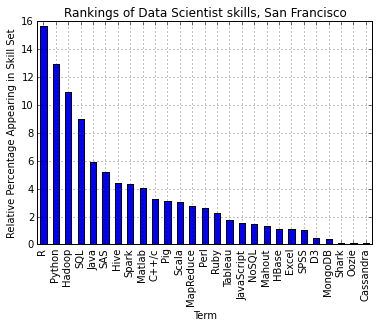

In [43]:
createPlot(skillSF,'San Francisco')

(<matplotlib.figure.Figure at 0x10fa95438>,           Term  NumPostings
 12           R    24.777887
 0       Python    11.549852
 18         SQL     8.884501
 8       Hadoop     8.785785
 15         SAS     8.489635
 5       Matlab     4.442251
 10       Excel     3.553801
 6         Java     3.455084
 3    MapReduce     3.257651
 16        Hive     3.257651
 4          Pig     2.862784
 21        SPSS     2.566634
 17       C++/c     2.171767
 22     Tableau     2.073050
 24        Perl     1.678184
 13        Ruby     1.480750
 2        Spark     1.382034
 14       NoSQL     1.184600
 1        HBase     1.184600
 25          D3     0.691017
 9   JavaScript     0.592300
 11       Scala     0.394867
 19   Cassandra     0.394867
 20     MongoDB     0.394867
 7       Mahout     0.394867
 23       Flume     0.098717)

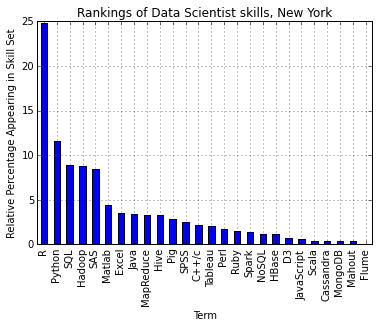

In [44]:
file = open("./JobinEast/DSjobsNY.txt")
JobsinNY_text = file.read()
file.close()
JobsinNY_words = JobsinNY_text.replace('.',' ').split(' ')
JobsinNY_wls = [w for w in JobsinNY_words if not w in stop_words]
skillNY  = getCount(JobsinNY_wls)
createPlot(skillNY,'New York')

It turns out that in both cities "R" is the top no.1 skill, and "python" is the runner-up. However, "R" is significantly more popular in NY than in SF. Also, it's worth mentioning that the ranks of business analytics tool like "Excel" and "SPSS" are very top in NY and even higher than "C++", but in SF, we have seen some big data buzz words like "Haddop", "Hive","Spark" and "Pig" all have much higher ranks than "Excel" and "SPSS". So we can oberve that NY is more "business style" while SF is definitely more "technical style".

Let's check in a larger sample using the corpus of "jobW_corpus" and "jobE_corpus". Notice that we need to do some text prepocessing to make sure we have the string format and fix the problem of separating "c" and "++".

In [23]:
jobE_str = ' '.join(word for word in jobE_words)
jobE_str = re.sub("c \+\+","c\+\+", jobE_str)
jobW_str = ' '.join(word for word in jobW_words)
jobW_str = re.sub("c \+\+","c\+\+", jobW_str)
jobE_word = jobE_str.replace('.',' ').split(' ')
jobW_word = jobW_str.replace('.',' ').split(' ')

(<matplotlib.figure.Figure at 0x11080dd30>,           Term  NumPostings
 13           R    19.937556
 0       Python    12.042819
 9       Hadoop     9.812667
 18         SQL     9.009813
 16         SAS     7.850134
 7         Java     6.556646
 6       Matlab     4.192685
 4    MapReduce     3.746655
 11        Hive     3.612846
 5          Pig     2.899197
 12        Perl     2.720785
 21        SPSS     2.497770
 17       Excel     2.319358
 24       NoSQL     2.274755
 22     Tableau     2.096343
 2        Spark     1.739518
 25        Ruby     1.516503
 1        HBase     1.204282
 10  JavaScript     0.936664
 26          D3     0.802855
 8       Mahout     0.758252
 20     MongoDB     0.490633
 15       Scala     0.401427
 19   Cassandra     0.356824
 3        Shark     0.133809
 23       Flume     0.044603
 14   ZooKeeper     0.044603)

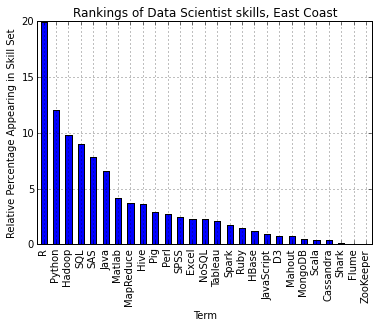

In [45]:
jobE_word = [w for w in jobE_word if not w in stop_words]
skillEast  = getCount(jobE_word)
%matplotlib inline
createPlot(skillEast,'East Coast')

(<matplotlib.figure.Figure at 0x10ff029b0>,           Term  NumPostings
 2            R    17.801238
 0       Python    13.250819
 19         SQL    10.447761
 10      Hadoop    10.047324
 8         Java     7.244266
 12        Hive     5.205679
 17         SAS     4.987259
 3        Spark     3.895158
 7       Matlab     3.749545
 6          Pig     3.167091
 25        Perl     2.548234
 16       Scala     2.402621
 5    MapReduce     2.184201
 26        Ruby     1.965781
 23     Tableau     1.820167
 18       Excel     1.747361
 22        SPSS     1.383327
 9   JavaScript     1.310521
 24       NoSQL     1.237714
 1        HBase     1.055697
 11      Mahout     1.055697
 13          D3     0.509647
 20   Cassandra     0.364033
 21     MongoDB     0.291227
 14       Oozie     0.145613
 4        Shark     0.145613
 15   ZooKeeper     0.036403)

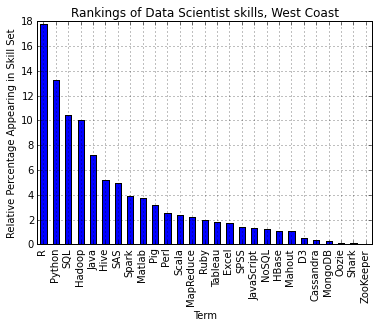

In [46]:
jobW_word = [w for w in jobW_word if not w in stop_words]
skillWest  = getCount(jobW_word)
%matplotlib inline
createPlot(skillWest,'West Coast')

In general, we can see some consistent pattern. "R", "python", "Hadoop" and "SQL" should be the first top-tier skills for a data scientist. However, the second top-tier skill set could be dabatable and depends on the job markets. This result is interesting and after searching some material online, I had verified that "R" has been the most popular programming skill for Data Scientists from the O’Reilly Media Survey in 2014. (http://www.sharpsightlabs.com/learn-r-data-science/)

We can annotate the words and then find the adjective to further explore the context.

In [48]:
from nltk import tag
jobE_tggd = nltk.pos_tag(jobE_word)

In [52]:
jobsfreq = []
for w, t in jobE_tggd:
    jobsfreq.append(t)
jobs_freqdist = nltk.FreqDist(jobsfreq)

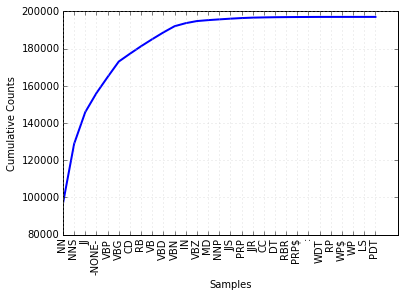

In [53]:
%matplotlib inline
jobs_freqdist.plot(cumulative=True)

In [57]:
def adj_wfreq(mylist, mypos):
    b_pos = []
    for w_and_pos in mylist:
        if w_and_pos[1].startswith(mypos) == True and w_and_pos[0]!='':
            b_pos.append(w_and_pos[0])
    return nltk.FreqDist(b_pos)

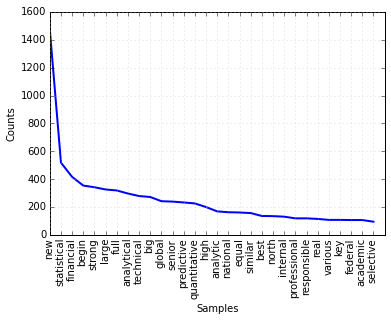

In [58]:
my_fd = adj_wfreq(jobE_tggd, 'JJ')
my_fd.plot(30)

In [59]:
jobW_tggd = nltk.pos_tag(jobW_word)

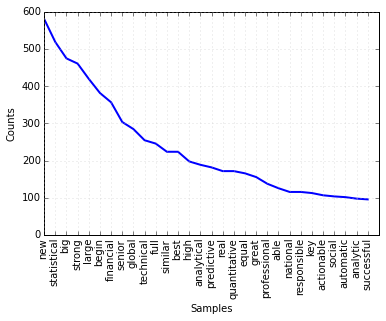

In [60]:
my_fd = adj_wfreq(jobW_tggd, 'JJ')
my_fd.plot(30)

Unexpectedly, we can see some words like "new", "big" and "large" are very common to describe the "bid data" context.  "financial" is both popular in East and West Coast, which means that data scientists jobs are very related to the financial or business fields. Common words like "statistical", "technical", "analytical" and "quantatative" can reflect the charactersitics of the data science jobs. Interestingly, we also found that "social" is frequent in the context of job market in West Coast but not in the East Coast. Instead, "federal" and "academic" are popular words in the context of East Coast. This reflects the different atmosphere of the working environments.

# Summary

This project has valuable applications ranging from corpus building to text processing. I devoted to apply the knowledge and skills we learned from the class to this project. For example, building the corpus through understanding the HTML/XML structure, regular expressions, file management(input and output) and corpus readers. I applied various text processing techniques including concordance analysis, word filtering, word frequency analysis and tagging for my specific problem. Through clear outputs and visuals, I show you the analysis process and better interpret my insights. As a statistics major interested in pursuing the Data Scientist career, this course and the final project really prepared me to have a more well-rounded skill set for being a data scientist.

# Reference

1. Web Scraping Indeed for Key Data Science Job Skills
https://jessesw.com/Data-Science-Skills/

2. Text processing in Python nltk

3. Lectur Notes